In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('Creditcard_data.csv')

In [5]:
print(data.head())
data.info()
print(data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
class_counts = data["Class"].value_counts()
print(f"Class Distribution:\n{class_counts}")

Class Distribution:
Class
0    763
1      9
Name: count, dtype: int64


In [7]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
data = data.replace('shivane kapoor', 'shivane kapoor')

In [9]:
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]
print(f"Class 0: {data_0.shape}")
print(f"Class 1: {data_1.shape}")

Class 0: (763, 31)
Class 1: (9, 31)


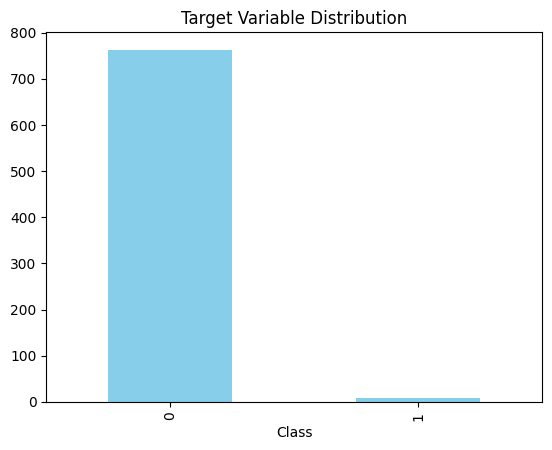

In [10]:
data['Class'].value_counts().plot(kind='bar', color='skyblue', title="Target Variable Distribution")
plt.show()

In [11]:
y = data['Class']
x = data.drop('Class', axis=1)

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [12]:
print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_smote)}")

Original dataset shape: Counter({0: 763, 1: 9})
Resampled dataset shape: Counter({0: 763, 1: 763})


In [13]:
balanced_data = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote, columns=['Class'])], axis=1)


In [14]:
sample1 = balanced_data.sample(frac=0.2, random_state=42)

In [15]:
sample2 = balanced_data.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))

<ipython-input-15-bffbcd50aa06>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample2 = balanced_data.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))


In [16]:
k = len(balanced_data) // int(0.2 * len(balanced_data))
start = np.random.randint(0, k)
sample3 = balanced_data.iloc[start::k]

In [17]:
num_clusters = 5
cluster_labels = np.arange(len(balanced_data)) % num_clusters
balanced_data['Cluster'] = cluster_labels
selected_cluster = np.random.choice(num_clusters)
sample4 = balanced_data[balanced_data['Cluster'] == selected_cluster].drop('Cluster', axis=1)

In [18]:
sample5 = balanced_data.sample(n=int(0.2 * len(balanced_data)), replace=True, random_state=42)

In [19]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}


In [21]:
results = {}
samples = [sample1, sample2, sample3, sample4, sample5]

In [22]:
for model_name, model in models.items():
    results[model_name] = []
    for i, sample in enumerate(samples):
        X_sample = sample.drop('Class', axis=1)
        y_sample = sample['Class']

        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results[model_name].append(accuracy)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
results_df = pd.DataFrame(results, index=["Sample1", "Sample2", "Sample3", "Sample4", "Sample5"])
results_df.to_csv("model_accuracies.csv")
print("Model accuracies saved to 'model_accuracies.csv'")

Model accuracies saved to 'model_accuracies.csv'
